# COMP 3115: Exploratory Data Analysis and Visualization
# Lab 8 Data Clustering Using Scikit-learn

In this lab, we are going to learn how to perform clustering on data using *k*-means algorithm and hierarchical clustering algorithm in scikit-learn. First, you will be shown how to implement *k*-means yourself. Then, you will be shown how to make use of related implementations in scikit-learn.

## 1. Implementation of *k*-means algorithm
The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what good clustering results should be:

- The "cluster center" is an average of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

###  *k*-Means algorithm
![k-means.png](attachment:k-means.png)

### 1.1 An implementation of k-means algorithm

The *k*-Means algorithm is simple enough that we can write it in a few lines of code. The following is a very basic implementation of *k*-Means algorithm by using the 'pairwise_distances_argmin' function from sklearn.

'pairwise_distances_argmin(X, centers)' computes for each row in 'X', the index of the row of 'centers' which is the closest. The detail of this function can be found in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def my_k_means(X, n_clusters, rseed=2):
    # Randomly choose n_clusters cluster centres
    rng = np.random.RandomState(rseed) # random number generator
    i = rng.permutation(X.shape[0])[:n_clusters] # select n_clusters data points randomly
    centers = X[i] # set the selected data points as centers

    while True:
        # Assign labels based on the closest center
        cluster_labels = pairwise_distances_argmin(X, centers)

        # Compute new centers per cluster
        new_centers = np.array([X[cluster_labels == i].mean(0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, cluster_labels


         x1        x2
0  0.836857  2.136359
1 -1.413658  7.409623
2  1.155213  5.099619
3 -1.018616  7.814915
4  1.271351  1.892542


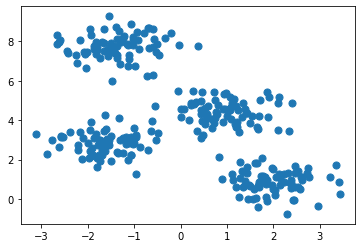

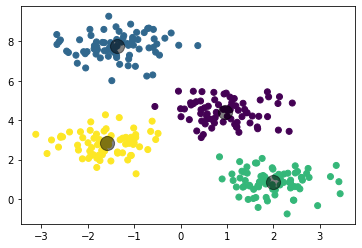

In [ ]:
# test our k-means algorithm
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
print(df.head(5))
X = df.values
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50);

centers, cluster_labels = my_k_means(X, 4)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels);
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## 2: Data Clustering using Scikit-learn

### 2.1 *K*-means clustering

[2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 0 0 3 3 3 0 3 1 0 3 2 3 0 1 3 1 0 1 0 3 0 0 1 3 3 2 2 0 1 2
 2 3 2 3 0 1 1 0 0 1 0 2 3 0 2 3 1 3 2 0 2 1 1 1 1 3 3 1 0 3 2 0 3 3 3 2 2
 1 0 0 3 2 1 3 0 1 0 2 2 3 3 0 2 2 2 0 1 1 2 2 0 2 2 2 1 3 1 0 2 2 1 1 1 2
 2 0 1 3]


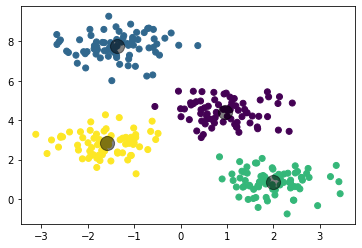

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 2.2 Agglomerative Hierachical Clustering

Key steps:
   1. Start with each sample in its own singleton cluster.
   2. At each step, greedily merge the two closest clusters.
   3. Stop when there is a single cluster of all samples.
   

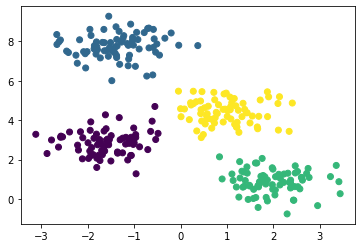

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
cluster_labels = agg.fit_predict(X)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels);

### 2.3 Visualization of Hierarchical Clustering by Dendrogram (An Example)
![hc.png](attachment:hc.png)

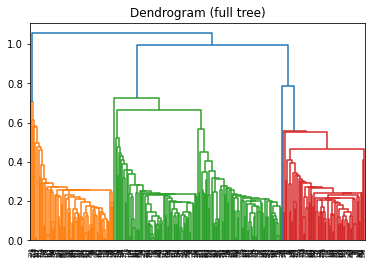

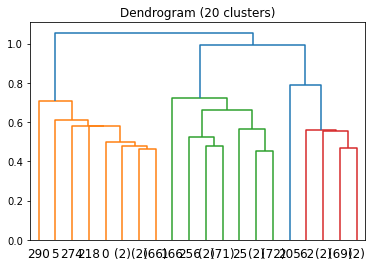

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("Dendrogram (full tree)")
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.figure()
plt.title("Dendrogram (20 clusters)")
dend1 = shc.dendrogram(shc.linkage(X, method='single'), p=20, truncate_mode='lastp')

## 3: Application: Color Quantization using *k*-Means

Perform a pixel-wise Vector Quantization (VQ) of an input image. The general idea is to reduce the number of colors required to show the images, while preserving the overall appearance quality.

Image Widht: 210
Image Height: 400
Channels/Dimension: 3
(210, 400, 3)


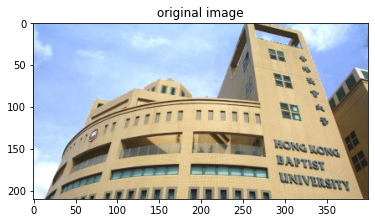

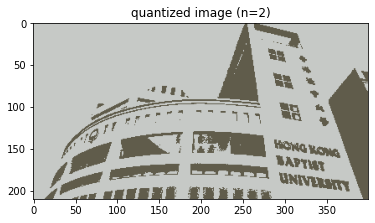

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("hkbu2.jpg")
plt.figure()
plt.title("original image")
plt.imshow(image)

#print(image)

width, height, depth = image.shape
print("Image Widht:",width)
print("Image Height:",height)
print("Channels/Dimension:",depth)

# convert 2D image into a set of pixel values for clustering
reshaped_image = np.reshape(image, (width * height, depth))

n_color = 2
model = KMeans(n_clusters=n_color)
labels = model.fit_predict(reshaped_image)
cluster = model.cluster_centers_

# convert the set of updated pixel values to 2D image
quantized_image = np.reshape(cluster[labels], (width, height, cluster.shape[1])).astype('uint8')

print(quantized_image.shape)
plt.figure()
plt.title("quantized image (n=2)")
plt.imshow(quantized_image);

(210, 400, 3)


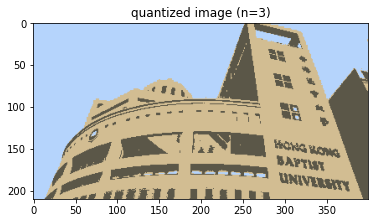

In [ ]:
n_color = 3
model = KMeans(n_clusters=n_color)
labels = model.fit_predict(reshaped_image)
cluster = model.cluster_centers_

quantized_image = np.reshape(cluster[labels], (width, height, cluster.shape[1])).astype('uint8')

print(quantized_image.shape)
plt.figure()
plt.title("quantized image (n=3)")
plt.imshow(quantized_image);